# Laurrel Gaussian Transform


In [26]:
 !pip install numpy

Defaulting to user installation because normal site-packages is not writeable


[[2.25617096e-53-3.77088724e-53j 2.73061596e-53-4.57304304e-53j
  3.30414974e-53-5.54472116e-53j ... 1.72639128e-51+3.02600465e-51j
  1.43292351e-51+2.50627744e-51j 1.18909619e-51+2.07539782e-51j]
 [2.52259749e-53-4.20128520e-53j 3.05308470e-53-5.09499670e-53j
  3.69436869e-53-6.17757930e-53j ... 1.93050333e-51+3.37138391e-51j
  1.60232933e-51+2.79233657e-51j 1.32966803e-51+2.31227762e-51j]
 [2.81990461e-53-4.67985593e-53j 3.41293150e-53-5.67537060e-53j
  4.12982099e-53-6.88127078e-53j ... 2.15830136e-51+3.75542012e-51j
  1.79139260e-51+3.11041317e-51j 1.48655061e-51+2.57567044e-51j]
 ...
 [2.79058666e-52+4.30211815e-52j 3.37779704e-52+5.21727917e-52j
  4.08773102e-52+6.32584428e-52j ... 2.14123613e-50-3.45229880e-50j
  1.77702321e-50-2.85935404e-50j 1.47445706e-50-2.36777343e-50j]
 [2.50718282e-52+3.87871234e-52j 3.03474364e-52+4.70380506e-52j
  3.67255857e-52+5.70326743e-52j ... 1.92356011e-50-3.11253051e-50j
  1.59638105e-50-2.57794217e-50j 1.32457893e-50-2.13474194e-50j]
 [2.252097

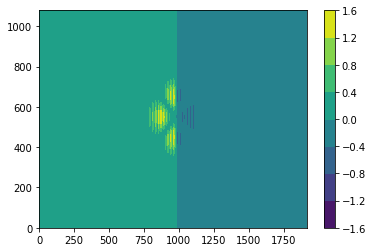

In [2]:
import numpy as np
from cmath import phase
from math import factorial
from scipy.special import assoc_laguerre as lg
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
w0=100 # Waist Beam
P = 0  # Radial Index
LG = [
    (2,np.sqrt(5/80)),
    (-2,np.sqrt(5/80)),
    (3,np.sqrt(0/80)),
    (4,np.sqrt(0/80)),
    (0,np.sqrt(0/105)),
    ]
WIDTH  = 1920 # HARDCODED
HEIGHT = 1080 # HARDCODED
def getAxis(magnitute,shift):
    return np.linspace(-1*magnitute/2+shift,magnitute/2+shift-1,magnitute)
def car2polar(x,y):
    rho = np.hypot(x,y)
    phi = np.arctan2(y, x)
    return rho, phi
def Lpl(x,l,p):
    value = 0
    for i in range(p+1):
        value = value+((-1)**(i))*factorial(p+abs(l))/factorial(p-i)/factorial(abs(l)+i)/factorial(i)*x**i
    return value
def N_PL(p,l):
    return np.sqrt(factorial(p)/factorial(p+abs(l)))
def lagurrelGussian(rho,phi,w,l,p):
    # res = ((-1)**p)* np.sqrt( 2*factorial(p)/w/w/factorial(p+abs(l)))*((np.sqrt(2)*rho)**abs(l))
    # c=1.5
    # x=(rho/(w/c))**2
    # res = res* ( np.exp(1j*l*phi) * Lpl(2*x,l,p) * np.exp((-1*(rho/w))**2))
    # return res
    # return lg(2*((rho/w)**2),p,l)*np.exp(-1*((rho/w)**2))*np.exp(-1j*l*phi)*((np.sqrt(2)*rho/w)**abs(l))
    rho2w = rho/w
    return N_PL(p,l)*np.power(np.sqrt(2)*rho2w,abs(l))*lg(2*np.power(rho2w,2),p,abs(l))*np.exp(-1*np.power(rho2w,2))*np.exp(complex(0,-1)*l*phi)

x, y     = getAxis(WIDTH,-10),getAxis(HEIGHT,-10)
xv, yv   = np.meshgrid(x,y)
rho, phi = car2polar(xv,yv)
# c=1.5
# q= (rho/(w0/c))**2
# out = lpl(2*q,LG[0],P)
out  = 0
for m,n in LG:
    temp = n*lagurrelGussian(rho,phi,w0,m,P)
    print(temp)
    out += temp
    
    
phase = np.angle(out)
amp   = np.absolute(out)
phase_mod = np.fmod(phase -2*np.pi*x/20,2*np.pi)  
res = amp*phase_mod
# if out == lagurrelGussian(rho,phi,w0,LG[0][0],P)*np.sqrt(5/80):print(True)
# print (out)
fig = plt.figure()
# plt.contourf(out)
# out = np.angle(lagurrelGussian(rho,phi,w0,LG[0][0],P),deg=True)
# plt.contourf(np.angle(lagurrelGussian(rho,phi,w0,LG[0][0],P)))
plt.contourf(res)
plt.colorbar()
plt.show()
